# Типы данных Series

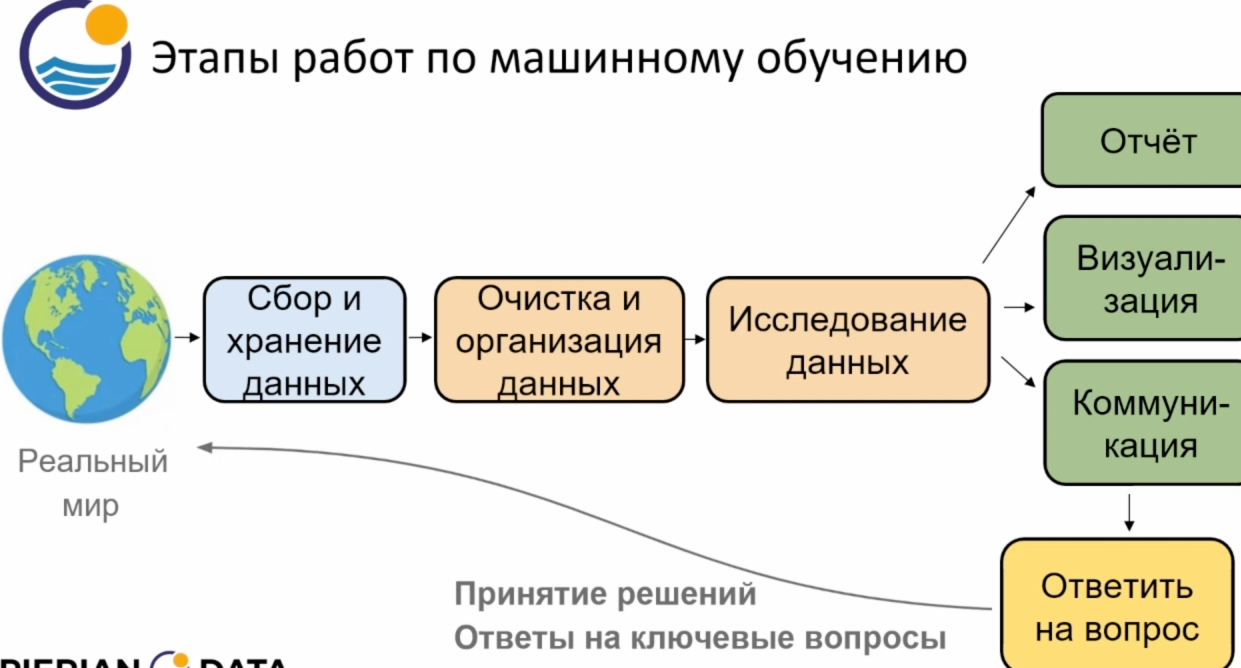
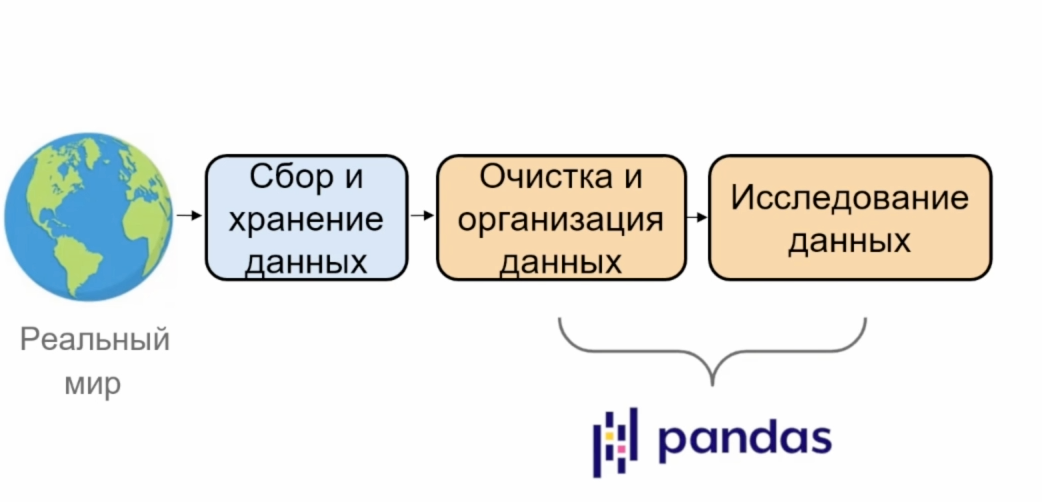
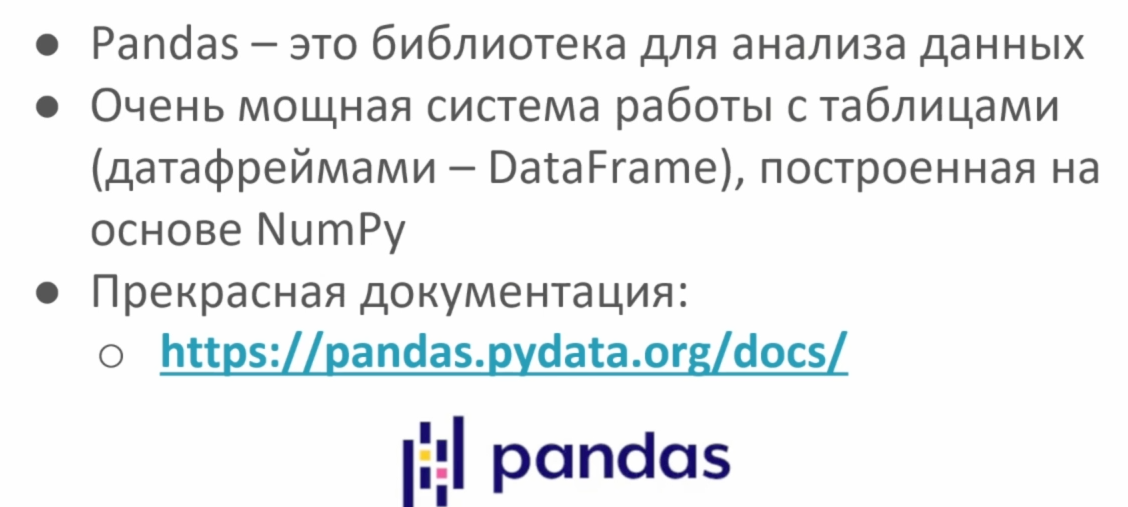
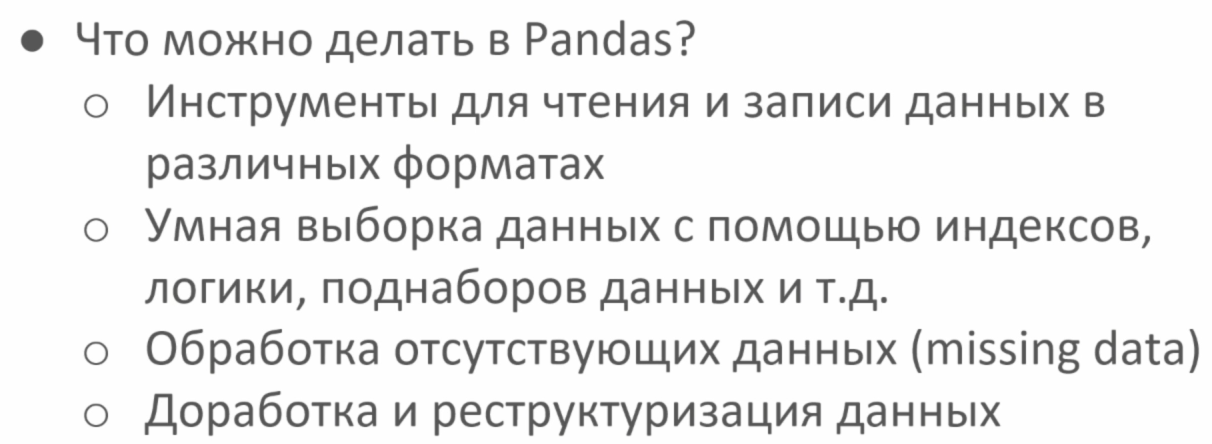

В Pandas есть два основных типа данных - Series и DataFrame. Начнём с Series. Давайте импортируем Pandas и исследуем объект Series.

Series - это проиндексированный одномерный массив значений. Он очень похож на массив NumPy, и в его основе как раз и лежит массив NumPy. Отличие Series в том, что в нём для каждого элемента можно указать некоторое название (метка - label). В результате можно обращаться к отдельному элементу Series не только по его номеру внутри массива, как в NumPy, но и по значению метки. В этом отношении Series очень похож на словарь (Dictionary). Метки могут быть любого типа данных, необязательно числа или строки.

Давайте рассмотрим это на примерах:

## Imports

In [5]:
import numpy as np
import pandas as pd

## Создаём Series на основе объектов Python

In [13]:
help(pd.Series)

Help on class Series in module pandas.core.series:

class Series(pandas.core.base.IndexOpsMixin, pandas.core.generic.NDFrame)
 |  One-dimensional ndarray with axis labels (including time series).
 |  
 |  Labels need not be unique but must be a hashable type. The object
 |  supports both integer- and label-based indexing and provides a host of
 |  methods for performing operations involving the index. Statistical
 |  methods from ndarray have been overridden to automatically exclude
 |  missing data (currently represented as NaN).
 |  
 |  Operations between Series (+, -, /, *, **) align values based on their
 |  associated index values-- they need not be the same length. The result
 |  index will be the sorted union of the two indexes.
 |  
 |  Parameters
 |  ----------
 |  data : array-like, Iterable, dict, or scalar value
 |      Contains data stored in Series.
 |  
 |      .. versionchanged :: 0.23.0
 |         If data is a dict, argument order is maintained for Python 3.6
 |      

### На основе двух списков - Index и Data

Мы можем создать объект Series на основе списков Python (а также на основе массивов NumPy)

In [1]:
myindex = ['USA','Canada','Mexico']

In [2]:
mydata = [1776,1867,1821]

In [6]:
myser = pd.Series(data=mydata)

In [7]:
myser

0    1776
1    1867
2    1821
dtype: int64

In [10]:
pd.Series(data=mydata,index=myindex)

USA       1776
Canada    1867
Mexico    1821
dtype: int64

In [23]:
ran_data = np.random.randint(0,100,4)

In [24]:
ran_data

array([39, 35, 37, 23])

In [26]:
names = ['Andrew','Bobo','Claire','David']

In [27]:
ages = pd.Series(ran_data,names)

In [28]:
ages

Andrew    39
Bobo      35
Claire    37
David     23
dtype: int32

### На основе словаря (Dictionary)

In [29]:
ages = {'Sammy':5,'Frank':10,'Spike':7}

In [30]:
ages

{'Frank': 10, 'Sammy': 5, 'Spike': 7}

In [31]:
pd.Series(ages)

Sammy     5
Frank    10
Spike     7
dtype: int64

# Работа с Series

## Именованный индекс (Named Index)

In [12]:
# Вымышленные данные о продажах за 1й и 2й квартал для некоторой глобальной компании в разных странах
q1 = {'Japan': 80, 'China': 450, 'India': 200, 'USA': 250}
q2 = {'Brazil': 100,'China': 500, 'India': 210,'USA': 260}

In [13]:
# Преобразуем данные в Pandas Series
sales_Q1 = pd.Series(q1)
sales_Q2 = pd.Series(q2)

In [34]:
sales_Q1

Japan     80
China    450
India    200
USA      250
dtype: int64

In [35]:
# Получаем отдельный элемент массива с помощью его названия
sales_Q1['Japan']

80

In [36]:
# Также сохраняется возможность получить элемент по его номеру позиции внутри массива!
sales_Q1[0]

80

**Будьте аккуратны - возможные ошибки!**

In [37]:
# Неправильное название (такого элемента нет в объекте Series)
# sales_Q1['France']

In [38]:
# Случайно указали пробел после названия страны
# sales_Q1['USA ']

In [39]:
# Случайно написали название не в том регистре - маленькими буквами
# sales_Q1['usa']

## Операции

In [40]:
# Получаем только ключи индекса
sales_Q1.keys()

Index(['Japan', 'China', 'India', 'USA'], dtype='object')

In [41]:
# Можно выполнять операции сразу для всех элементов Series (выполнение операции в режиме Broadcast)
sales_Q1 * 2

Japan    160
China    900
India    400
USA      500
dtype: int64

In [42]:
sales_Q2 / 100

Brazil    1.0
China     5.0
India     2.1
USA       2.6
dtype: float64

## Операции с разными объектами Series

In [14]:
# Вспомним, как выглядят наши два объекта Series
sales_Q1

Japan     80
China    450
India    200
USA      250
dtype: int64

In [15]:
# Вспомним, как выглядят наши два объекта Series
sales_Q2

Brazil    100
China     500
India     210
USA       260
dtype: int64

In [43]:
# Обратите внимание, что Pandas возвращает NaN (not-a-number) для несовпадающих меток!
sales_Q1 + sales_Q2

Brazil      NaN
China     950.0
India     410.0
Japan       NaN
USA       510.0
dtype: float64

In [44]:
# Но Вы можете для таких случаев указать значение, на которое следует заменять отсутствующие значения
sales_Q1.add(sales_Q2,fill_value=0)

Brazil    100.0
China     950.0
India     410.0
Japan      80.0
USA       510.0
dtype: float64